# Metrics - 04 - Homework - 2024

In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('bank/bank-full.csv', delimiter = ";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
features = [
    'age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'y'   
]

df = df[features].copy()

In [8]:
df['y'] = (df.y == 'yes').astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 5.2+ MB


In [12]:
for col in df.columns:
    print(col, df[col].dtypes)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

age int64
[58 44 33 47 35]
77

job object
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown']
12

marital object
['married' 'single' 'divorced']
3

education object
['tertiary' 'secondary' 'unknown' 'primary']
4

balance int64
[2143   29    2 1506    1]
7168

housing object
['yes' 'no']
2

contact object
['unknown' 'cellular' 'telephone']
3

day int64
[5 6 7 8 9]
31

month object
['may' 'jun' 'jul' 'aug' 'oct']
12

duration int64
[261 151  76  92 198]
1573

campaign int64
[1 2 3 5 4]
48

pdays int64
[ -1 151 166  91  86]
559

previous int64
[0 3 1 4 2]
41

poutcome object
['unknown' 'failure' 'other' 'success']
4

y int64
[0 1]
2



In [14]:
numerical = [
    'age',
    'previous',
    'pdays',
    'campaign',
    'duration',
    'day',
    'balance'
]

categorical = [
    'job',
    'marital',
    'education',
    'housing',
    'contact',
    'month',
    'poutcome'    
]

In [20]:
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1, shuffle=True)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1, shuffle = True)

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = df_train['y']
y_val = df_val['y']
y_test = df_test['y']

del df_train['y']
del df_val['y']
del df_test['y']

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve

In [32]:
numerical

['age', 'previous', 'pdays', 'campaign', 'duration', 'day', 'balance']

In [48]:
for f in numerical:
    auc = roc_auc_score(y_train, df_train[f])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[f])
    print('%.3f: %s' % (auc, f))

    

0.512: age
0.599: previous
0.590: pdays
0.571: campaign
0.815: duration
0.526: day
0.589: balance


In [59]:
fpr_duration, tpr_duration, thresholds = roc_curve(y_train, df_train.duration)
                                        

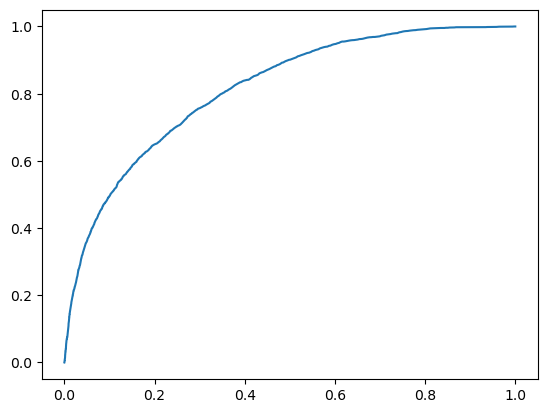

In [67]:
import matplotlib.pyplot as plt

plt.plot(fpr_duration, tpr_duration, label='duration')

## Training Model

In [72]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

dv = DictVectorizer(sparse=False)

dict_train = df_train[categorical+numerical].to_dict(orient = 'records')
X_train = dv.fit_transform(dict_train)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [74]:
dict_val = df_val[categorical+numerical].to_dict(orient = 'records')
X_val = dv.transform(dict_val)

y_pred = model.predict_proba(X_val)[:, 1]

roc_auc_score(y_val, y_pred)

0.900416187446919

## Precision and Recall

- **Precision:** % of Positive Predictions That Are Correct. (TP / TP + FP)
- **Recall:** % of Correctly Identified Positive Examples. (TP / TP + FN)

In [97]:
def confusion_matrix_df(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0,1,101)
    for t in thresholds: 
        actual_positives = (y_val == 1)
        actual_negatives = (y_val == 0)
        
        predict_positives = (y_pred >= t)
        predict_negatives = (y_pred < t)
        
        tp = (predict_positives & actual_positives).sum()
        fp = (predict_positives & actual_negatives).sum()
        
        tn = (predict_negatives & actual_negatives).sum()
        fn = (predict_negatives & actual_positives).sum()
    
        scores.append((t, tp, fp, tn, fn))
    
    columns = ['threshold', 'tp', 'fp', 'tn', 'fn']
    df_scores = pd.DataFrame(scores, columns=columns)

    return df_scores

In [99]:
df_scores = confusion_matrix_df(y_val, y_pred)
df_scores

,threshold,tp,fp,tn,fn
0,0.00,1098,7944,0,0
1,0.01,1094,7004,940,4
2,0.02,1093,5788,2156,5
3,0.03,1087,4742,3202,11
4,0.04,1068,3800,4144,30
...,...,...,...,...,...
96,0.96,30,17,7927,1068
97,0.97,25,15,7929,1073
98,0.98,21,10,7934,1077
99,0.99,11,5,7939,1087


In [101]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

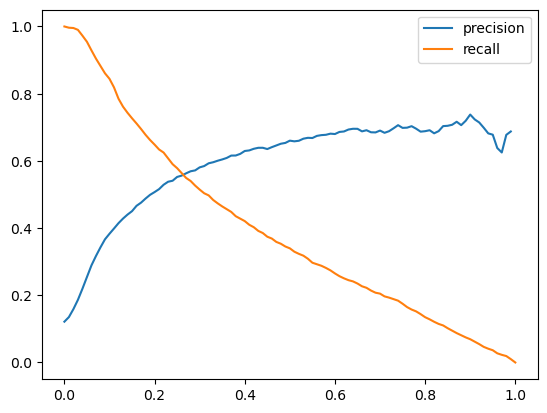

In [109]:
import matplotlib.pyplot as plt

plt.plot(df_scores.threshold, df_scores.precision, label = 'precision')
plt.plot(df_scores.threshold, df_scores.recall, label = 'recall')
plt.legend()
plt.show()

# F1 Score

In [112]:
df_scores

,threshold,tp,fp,tn,fn,precision,recall
0,0.00,1098,7944,0,0,0.121433,1.000000
1,0.01,1094,7004,940,4,0.135095,0.996357
2,0.02,1093,5788,2156,5,0.158843,0.995446
3,0.03,1087,4742,3202,11,0.186481,0.989982
4,0.04,1068,3800,4144,30,0.219392,0.972678
...,...,...,...,...,...,...,...
96,0.96,30,17,7927,1068,0.638298,0.027322
97,0.97,25,15,7929,1073,0.625000,0.022769
98,0.98,21,10,7934,1077,0.677419,0.019126
99,0.99,11,5,7939,1087,0.687500,0.010018


In [116]:
df_scores['f1_score'] = 2 * ((df_scores.precision * df_scores.recall) /
                             (df_scores.precision + df_scores.recall))
df_scores.f1_score

0      0.216568
1      0.237930
2      0.273969
3      0.313844
4      0.358029
         ...   
96     0.052402
97     0.043937
98     0.037201
99     0.019749
100         NaN
Name: f1_score, Length: 101, dtype: float64

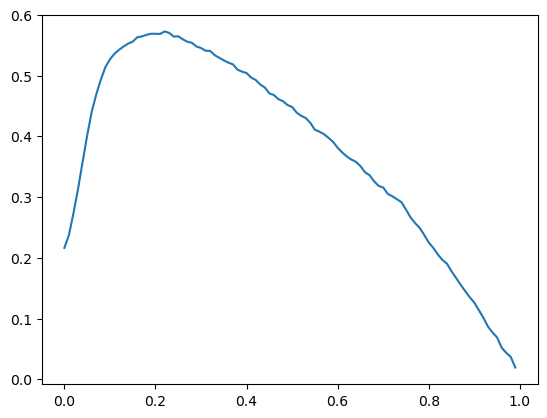

In [118]:
plt.plot(df_scores.threshold, df_scores.f1_score)

In [134]:
df_scores.iloc[df_scores['f1_score'].idxmax()]

threshold       0.220000
tp            686.000000
fp            611.000000
tn           7333.000000
fn            412.000000
precision       0.528913
recall          0.624772
f1_score        0.572860
Name: 22, dtype: float64

## 5-Fold CV

In [143]:
from sklearn.model_selection import KFold

In [145]:
columns = list(df.columns)
columns.remove('y')
columns

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [153]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient = 'records')

    dv = DictVectorizer()

    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient = 'records')

    X = dv.transform(dicts)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [155]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.y.values
    y_val = df_val.y.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.906 +- 0.006


## Hyperparameter Tuning

In [168]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.000001, 0.001, 1]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.y.values
        y_val = df_val.y.values
    
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    print('%.5f +- %.3f <--- %f' % ((np.mean(scores), np.std(scores), C)))

0.70144 +- 0.009 <--- 0.000001
0.86098 +- 0.007 <--- 0.001000
0.90605 +- 0.006 <--- 1.000000
